## CS 445: Computational Photography

## Programming Project #3: Gradient Domain Fusion

In [2]:
import cv2
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time
import scipy
import scipy.sparse.linalg

# modify to where you store your project data including utils.py
datadir = "/Users/lorna/master2/cs445/proj3/cs445_proj3_starter_code/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .
import utils

cp: ./utils.py and /Users/lorna/master2/cs445/proj3/cs445_proj3_starter_code/utils.py are identical (not copied).
cp: ./samples and /Users/lorna/master2/cs445/proj3/cs445_proj3_starter_code/samples are identical (not copied).


## Part 1 Toy Problem (20 pts)

/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_6451/2379516866.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread('samples/toy_problem.png')


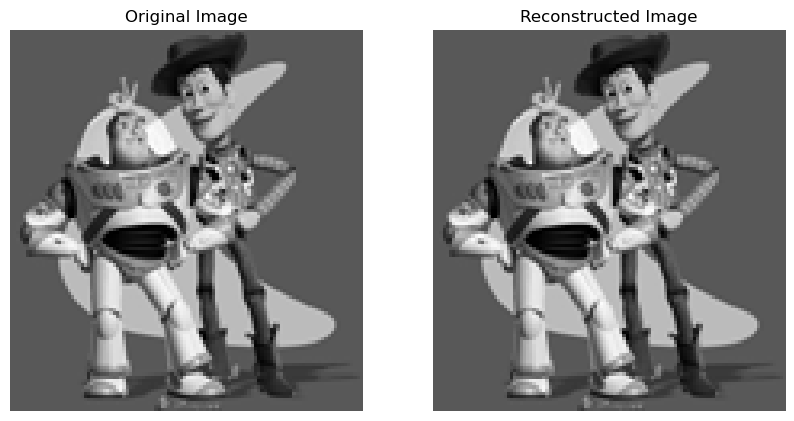

In [7]:
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from imageio import imread

# Load toy problem image
im = imread('samples/toy_problem.png')
im = im.astype('double') / 255
im_h, im_w = im.shape

# Initialize matrices
num_equations = im_h * (im_w - 1) + (im_h - 1) * im_w + 1
A = scipy.sparse.lil_matrix((num_equations, im_h * im_w))
b = np.zeros(num_equations)

# Variable indexing
im2var = np.arange(im_h * im_w).reshape(im_h, im_w)

e = 0
# x-gradient constraints
for y in range(im_h):
    for x in range(im_w - 1):
        A[e, im2var[y, x+1]] = 1
        A[e, im2var[y, x]] = -1
        b[e] = im[y, x+1] - im[y, x]
        e += 1

# y-gradient constraints
for y in range(im_h - 1):
    for x in range(im_w):
        A[e, im2var[y+1, x]] = 1
        A[e, im2var[y, x]] = -1
        b[e] = im[y+1, x] - im[y, x]
        e += 1

# Intensity constraint for pixel (0,0)
A[e, im2var[0, 0]] = 1
b[e] = im[0, 0]

# Solve least squares
v = scipy.sparse.linalg.lsqr(A.tocsr(), b)[0]

# Reconstruct image
reconstructed_im = v.reshape(im_h, im_w)

# Display original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(reconstructed_im, cmap='gray')
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


In [9]:
def toy_reconstruct(img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2
    
    :param toy_img: numpy.ndarray
    """
    
    # TO DO



In [11]:
def toy_reconstruct(img):
    import numpy as np
    import scipy.sparse
    import scipy.sparse.linalg
    
    h, w = img.shape
    num_eqs = (h * (w - 1)) + ((h - 1) * w) + 1

    im2var = np.arange(h * w).reshape(h, w)

    A = scipy.sparse.lil_matrix((num_eqs, h * w))
    b = np.zeros(num_eqs)

    e = 0
    # x-gradient constraints
    for y in range(h):
        for x in range(w - 1):
            A[e, im2var[y, x+1]] = 1
            A[e, im2var[y, x]] = -1
            b[e] = img[y, x+1] - img[y, x]
            e += 1

    # y-gradient constraints
    for y in range(h - 1):
        for x in range(w):
            A[e, im2var[y+1, x]] = 1
            A[e, im2var[y, x]] = -1
            b[e] = img[y+1, x] - img[y, x]
            e += 1

    # Fixed pixel constraint
    A[e, im2var[1, 1]] = 1
    b[e] = img[1, 1]

    # Solve the least squares problem
    v = scipy.sparse.linalg.lsqr(A.tocsr(), b)[0]
    
    reconstructed_img = v.reshape(h, w)
    return reconstructed_img



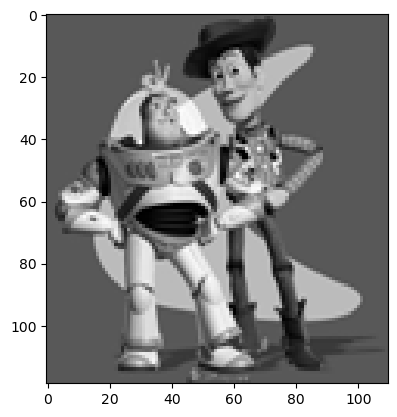

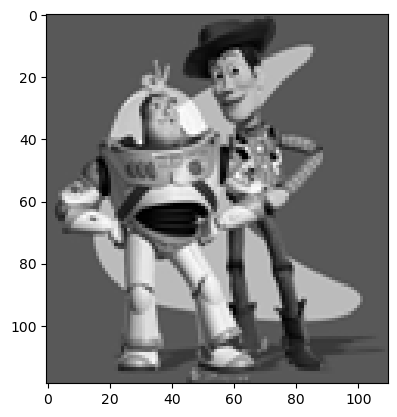

Max error is:  0.0011500374223067933


In [13]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
plt.imshow(toy_img, cmap="gray")
plt.show()

im_out = toy_reconstruct(toy_img)
plt.imshow(im_out, cmap="gray")
plt.show()
print("Max error is: ", np.sqrt(((im_out - toy_img)**2).max()))

## Preparation

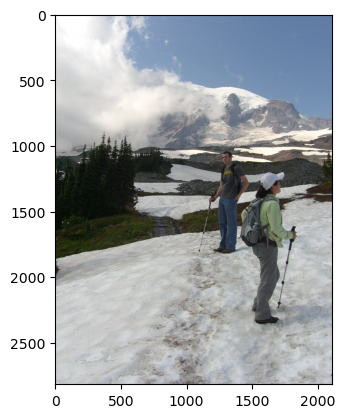

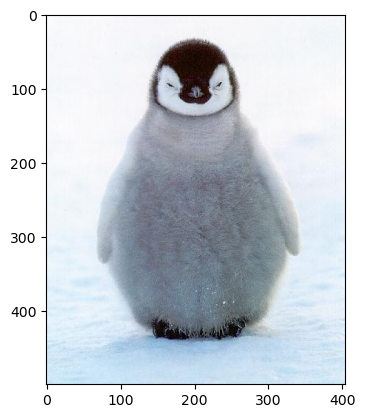

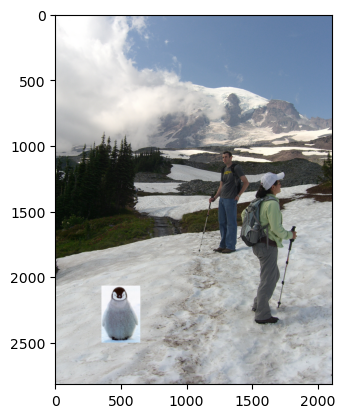

In [16]:
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.imshow(object_img)
plt.show()

use_interface = False  # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:
  xs = (65, 359, 359, 65)
  ys = (24, 24, 457, 457)
  object_mask = utils.get_mask(ys, xs, object_img)
  bottom_center = (500, 2500) # (x,y)

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



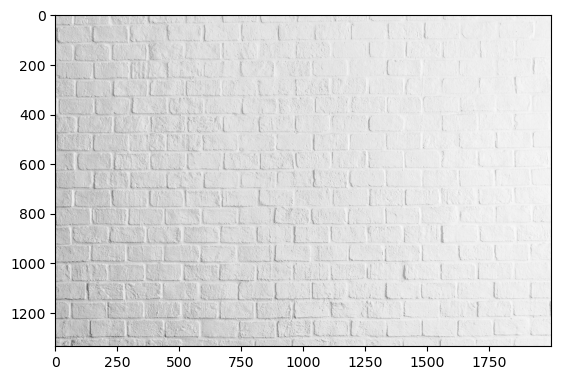

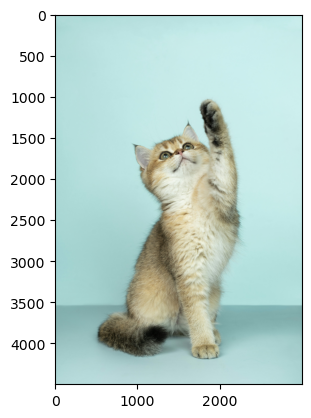

In [18]:
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.imshow(object_img)
plt.show()





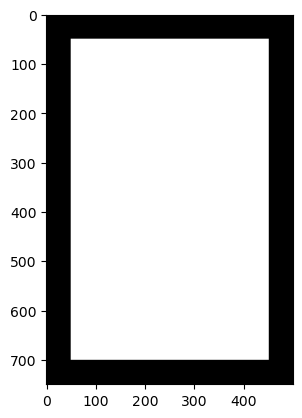

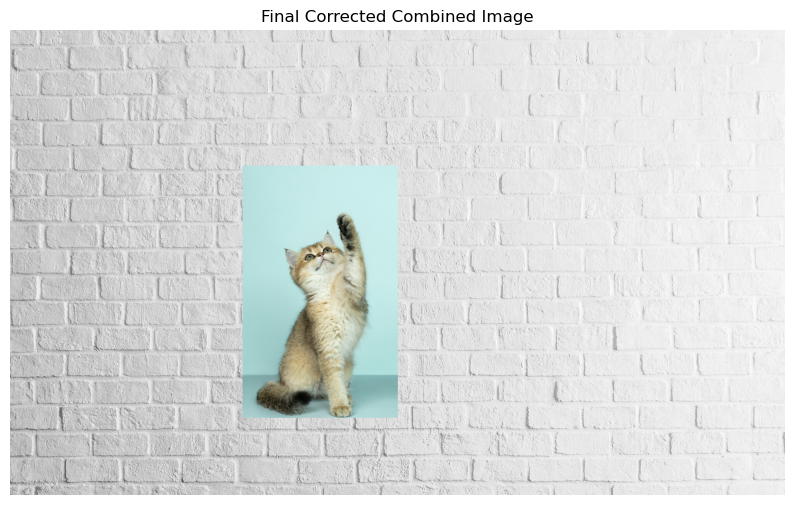

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils

# 重新載入背景圖片並確保尺寸合理
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入貓咪圖片並調整尺寸合理
object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (500, 750)).astype('double') / 255.0

# 遮罩（包住貓咪主體）
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

bottom_center = (800, 1000)

# Crop
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 8))
plt.imshow(combined_img)
plt.title("Final Corrected Combined Image")
plt.axis("off")
plt.show()


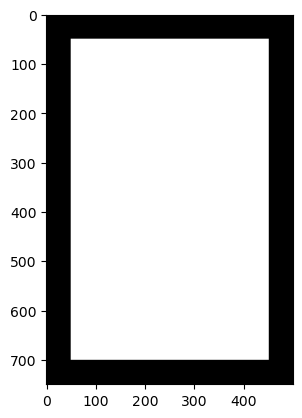

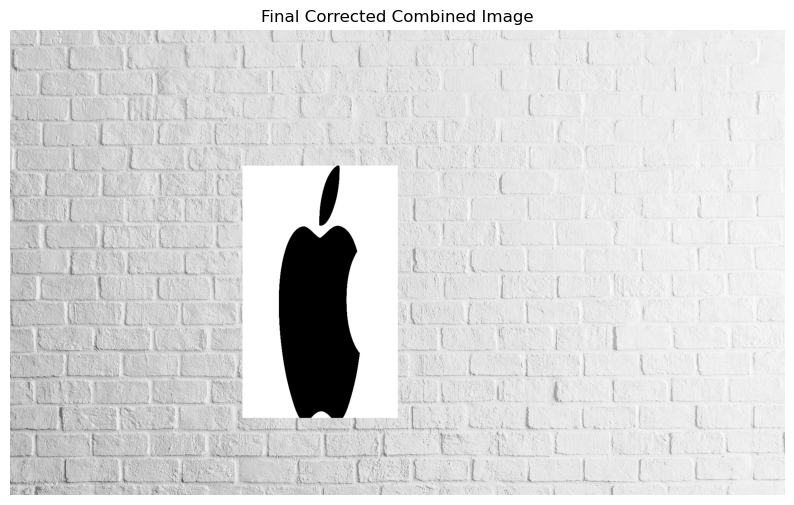

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils

# 重新載入背景圖片並確保尺寸合理
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入貓咪圖片並調整尺寸合理
object_img = cv2.cvtColor(cv2.imread('samples/logo.jpg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (500, 750)).astype('double') / 255.0

# 遮罩（包住貓咪主體）
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

bottom_center = (800, 1000)

# Crop
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 8))
plt.imshow(combined_img)
plt.title("Final Corrected Combined Image")
plt.axis("off")
plt.show()


## Part 2 Poisson Blending (50 pts)

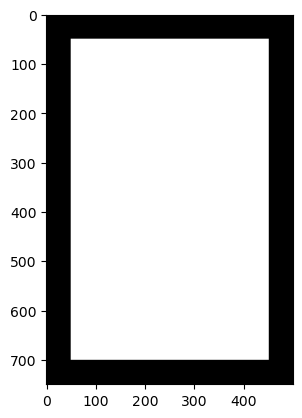

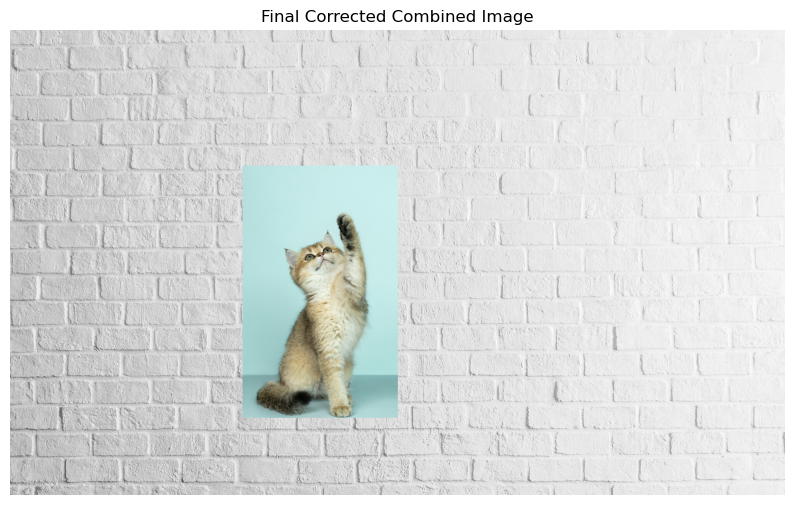

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils

# 重新載入背景圖片並確保尺寸合理
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入貓咪圖片並調整尺寸合理
object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (500, 750)).astype('double') / 255.0

# 遮罩（包住貓咪主體）
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

bottom_center = (800, 1000)

# Crop
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 8))
plt.imshow(combined_img)
plt.title("Final Corrected Combined Image")
plt.axis("off")
plt.show()




### another succesful case

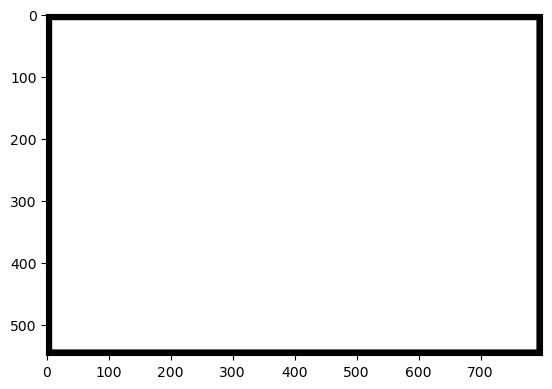

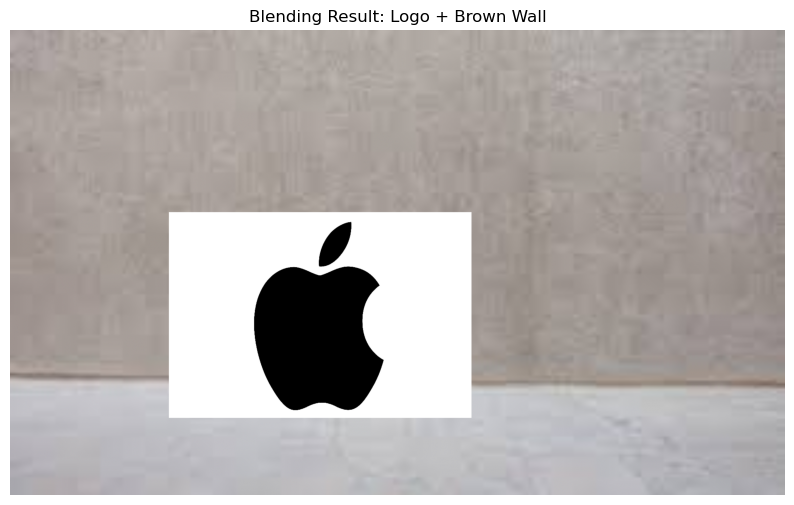

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils  # 這裡 utils 是你原本的工具包，需包含 get_mask 等函數

# 重新載入背景圖片（brown wall）
background_img = cv2.cvtColor(cv2.imread('samples/brown.jpeg'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入 logo 圖片
object_img = cv2.cvtColor(cv2.imread('samples/logo.jpg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (800, 550)).astype('double') / 255.0

# 遮罩（包住 logo 區域）
# 根據 object_img 自動建立適合的遮罩
h, w = object_img.shape[:2]
margin = 10  # 為了避免邊界貼齊，內縮一點

# 定義四個角的座標
xs = (margin, w - margin, w - margin, margin)
ys = (margin, margin, h - margin, h - margin)

# 建立遮罩
object_mask = utils.get_mask(ys, xs, object_img)

# 放置位置
bottom_center = (800, 1000)

# Crop object + mask
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 10))
plt.imshow(combined_img)
plt.title("Blending Result: Logo + Brown Wall")
plt.axis("off")
plt.show()


### failure case

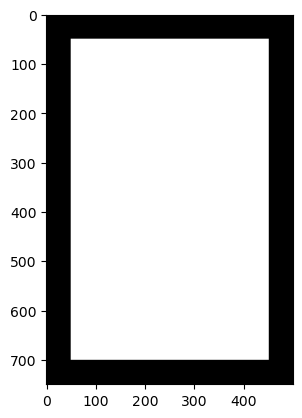

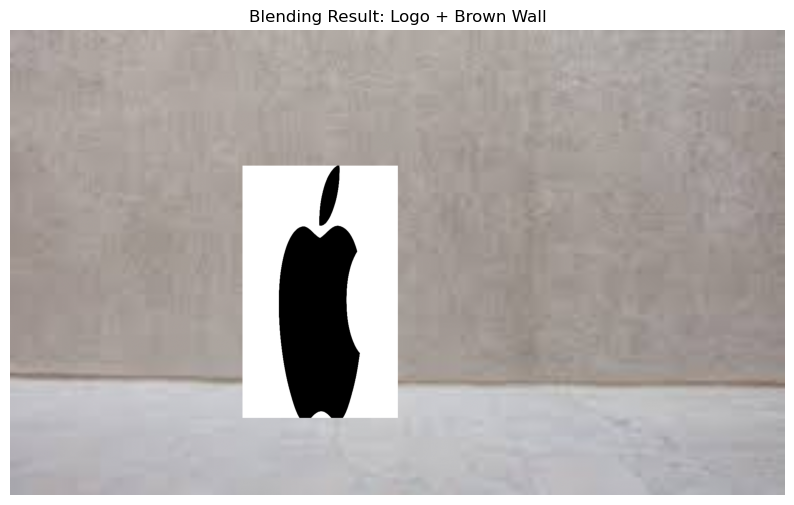

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils  # 這裡 utils 是你原本的工具包，需包含 get_mask 等函數

# 重新載入背景圖片（brown wall）
background_img = cv2.cvtColor(cv2.imread('samples/brown.jpeg'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入 logo 圖片
object_img = cv2.cvtColor(cv2.imread('samples/logo.jpg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (500, 750)).astype('double') / 255.0

# 遮罩（包住 logo 區域）
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

# 放置位置
bottom_center = (800, 1000)

# Crop object + mask
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 8))
plt.imshow(combined_img)
plt.title("Blending Result: Logo + Brown Wall")
plt.axis("off")
plt.show()


### This blending failed because the logo was resized with the wrong aspect ratio, causing distortion. It also used simple copy-paste without seamless blending, making the edges harsh andthe result look unnatural.

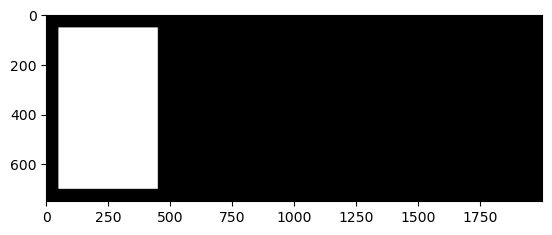

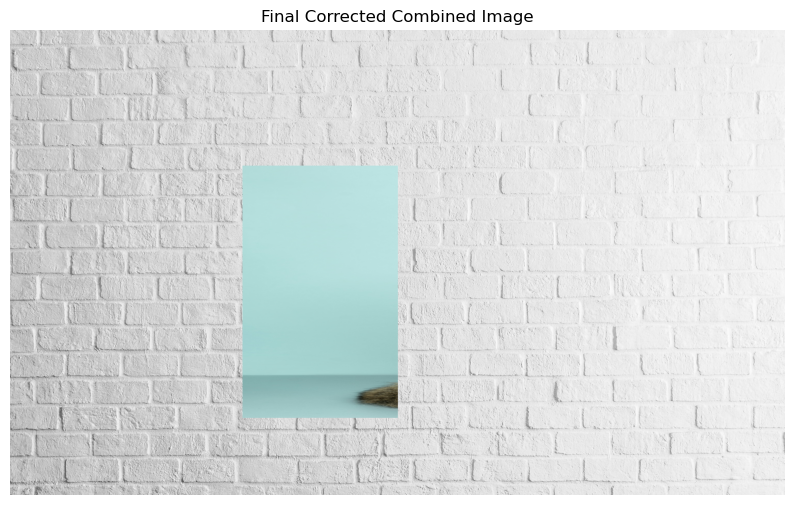

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils

# 重新載入背景圖片並確保尺寸合理
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0

# 重新載入貓咪圖片並調整尺寸合理
object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (2000, 750)).astype('double') / 255.0

# 遮罩（包住貓咪主體）
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

bottom_center = (800, 1000)

# Crop
object_img, object_mask = utils.crop_object_img(object_img, object_mask)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

# 防止越界
max_y = background_img.shape[0] - object_img.shape[0]
max_x = background_img.shape[1] - object_img.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# 合成並顯示
combined_img = utils.get_combined_img(background_img, object_img, object_mask, bg_ul)

plt.figure(figsize=(10, 8))
plt.imshow(combined_img)
plt.title("Final Corrected Combined Image")
plt.axis("off")
plt.show()




### The result failed because the mask didn't cover the cat after resizing, so only the background was pasted instead of the cat.

## Part 3 Mixed Gradients (20 pts)

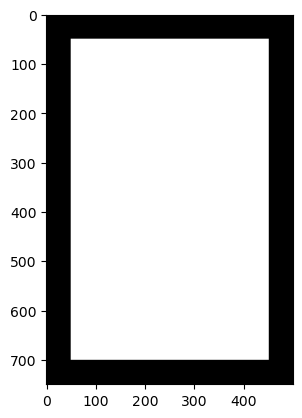

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.sparse
import scipy.sparse.linalg

# ========== Load and Prepare Images ==========
# Background: white wall
bg_img = cv2.imread('samples/wall.jpg')
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)
bg_img = cv2.resize(bg_img, (2000, 1200)).astype('float64') / 255.0

# Object: cat
obj_img = cv2.imread('samples/cat.jpeg')
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)
obj_img = cv2.resize(obj_img, (500, 750)).astype('float64') / 255.0

# ========== Create Mask ==========
# Define a rectangular region to mask the object
xs, ys = (50, 450, 450, 50), (50, 50, 700, 700)
mask = utils.get_mask(ys, xs, obj_img)

# Placement location on background image
bottom_center = (800, 1000)

# Crop object and mask to remove unnecessary padding
cropped_obj, cropped_mask = utils.crop_object_img(obj_img, mask)
bg_ul = utils.upper_left_background_rc(cropped_mask, bottom_center)

# Prevent out-of-bound errors
max_y = bg_img.shape[0] - cropped_obj.shape[0]
max_x = bg_img.shape[1] - cropped_obj.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# Crop background to match object region
bg_crop = bg_img[bg_ul[0]:bg_ul[0]+cropped_obj.shape[0], bg_ul[1]:bg_ul[1]+cropped_obj.shape[1]].copy()


In [64]:

def mix_blend(source, mask, target):
    h, w, ch = source.shape
    output = np.zeros_like(target)
    for c in range(ch):
        out = target[:, :, c] * (~mask)
        output[:, :, c] = out

    im2var = np.arange(h * w).reshape(h, w)
    idxs = [(0,1), (0,-1), (1,0), (-1,0)]
    
    pixels = np.transpose(np.nonzero(mask))
    N = pixels.shape[0]
    A = scipy.sparse.lil_matrix((4 * N, h * w))
    b = np.zeros((4 * N, ch))
    e = 0

    for y, x in pixels:
        for dy, dx in idxs:
            ny, nx = y + dy, x + dx
            if 0 <= ny < h and 0 <= nx < w:
                A[e, im2var[y, x]] = 1
                if mask[ny, nx]:
                    A[e, im2var[ny, nx]] = -1
                    for c in range(ch):
                        gs = source[y, x, c] - source[ny, nx, c]
                        gt = target[y, x, c] - target[ny, nx, c]
                        b[e, c] = gs if abs(gs) > abs(gt) else gt
                else:
                    for c in range(ch):
                        gs = source[y, x, c] - source[ny, nx, c]
                        gt = target[y, x, c] - target[ny, nx, c]
                        b[e, c] = (gs if abs(gs) > abs(gt) else gt) + target[ny, nx, c]
                e += 1

    A = A[:e].tocsr()
    b = b[:e]
    x = np.zeros((h * w, ch))
    for c in range(ch):
        x[:, c] = scipy.sparse.linalg.lsqr(A, b[:, c])[0]

    for y, x_idx in pixels:
        for c in range(ch):
            output[y, x_idx, c] = np.clip(x[im2var[y, x_idx], c], 0, 1)

    return output

# Run the blending function
blended_crop = mix_blend(cropped_obj, cropped_mask.astype(bool), bg_crop)

# Insert result into the original background
final_img = bg_img.copy()
final_img[bg_ul[0]:bg_ul[0]+blended_crop.shape[0], bg_ul[1]:bg_ul[1]+blended_crop.shape[1]] = blended_crop



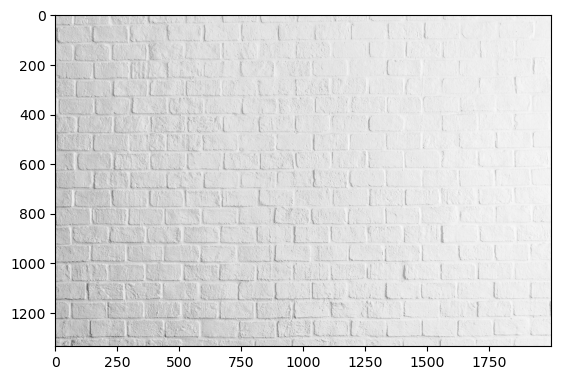

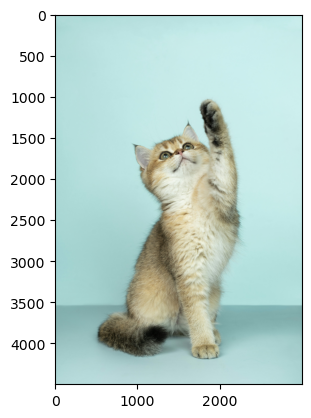

In [8]:
background_img = cv2.cvtColor(cv2.imread('samples/wall.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.imshow(object_img)
plt.show()




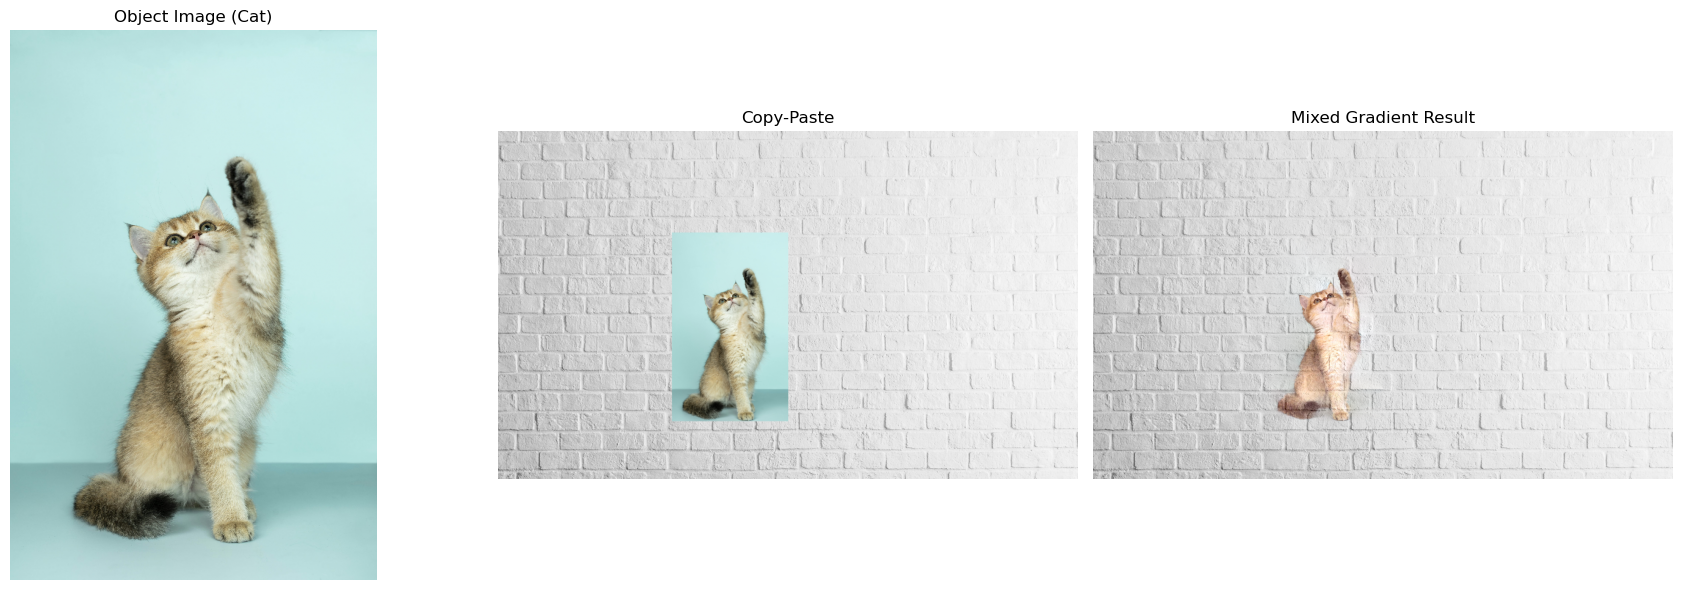

In [65]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(obj_img)
plt.title("Object Image (Cat)")
plt.axis('off')

plt.subplot(1, 3, 2)
copy_paste = utils.get_combined_img(bg_img, cropped_obj, cropped_mask, bg_ul)
plt.imshow(copy_paste)
plt.title("Copy-Paste")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_img)
plt.title("Mixed Gradient Result")
plt.axis('off')

plt.tight_layout()
plt.show()


# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [ ]:
def color2gray(img):
    pass

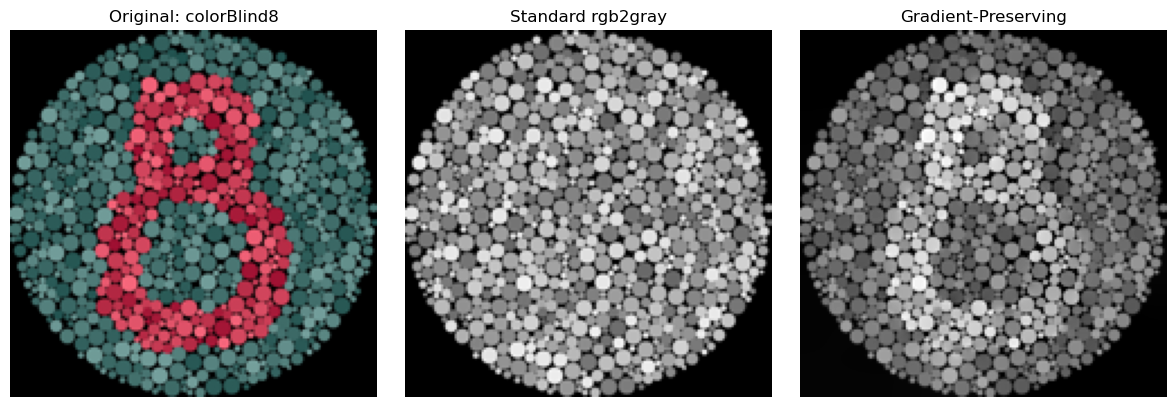

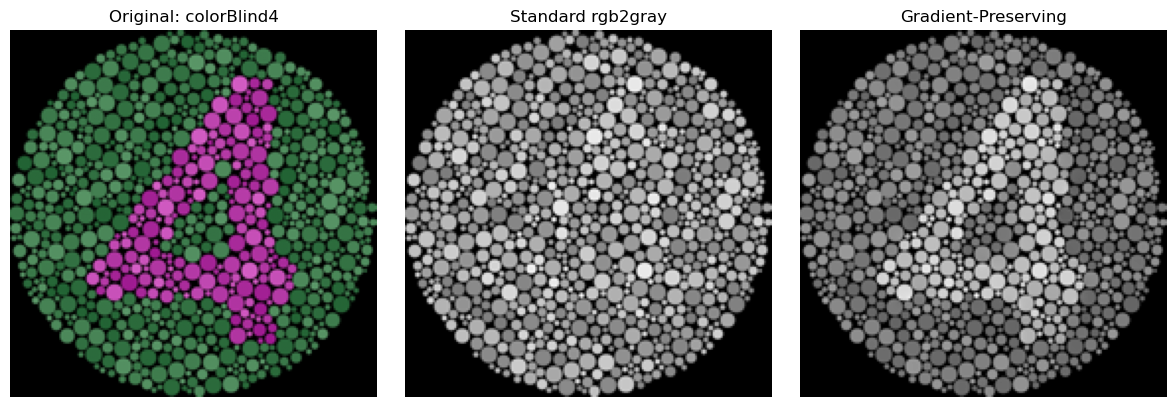

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg

# ========== Helper: Gradient-preserving grayscale ==========
def color2gray_gradient(img_rgb):
    h, w, _ = img_rgb.shape
    N = h * w
    
    # Convert to standard grayscale for intensity reference
    gray_initial = 0.2989 * img_rgb[:, :, 0] + 0.5870 * img_rgb[:, :, 1] + 0.1140 * img_rgb[:, :, 2]

    # Build variable index map
    im2var = np.arange(N).reshape(h, w)

    # Count number of constraints (horizontal and vertical)
    num_constraints = (h - 1) * w + h * (w - 1)
    A = scipy.sparse.lil_matrix((num_constraints + 1, N))
    b = np.zeros(num_constraints + 1)

    e = 0
    # Horizontal constraints
    for y in range(h):
        for x in range(w - 1):
            i, j = im2var[y, x], im2var[y, x + 1]
            A[e, i] = -1
            A[e, j] = 1
            # Pick strongest gradient across RGB channels
            grad = img_rgb[y, x + 1] - i４４４４mg_rgb[y, x]
            b[e] = np.max(np.abs(grad)) * np.sign(np.sum(grad))
            e += 1

    # Vertical constraints
    for y in range(h - 1):
        for x in range(w):
            i, j = im2var[y, x], im2var[y + 1, x]
            A[e, i] = -1
            A[e, j] = 1
            grad = img_rgb[y + 1, x] - img_rgb[y, x]
            b[e] = np.max(np.abs(grad)) * np.sign(np.sum(grad))
            e += 1

    # Fix one pixel to avoid floating solution
    A[e, im2var[0, 0]] = 1
    b[e] = gray_initial[0, 0]

    # Solve least squares
    x = scipy.sparse.linalg.lsqr(A.tocsr(), b)[0]
    result = x.reshape(h, w)
    result = np.clip(result, 0, 1)
    return result

# ========== Load and Convert Example Images ==========
def show_color2gray_results(img_path, title):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype('float64') / 255.0

    gray_rgb2gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY) / 255.0
    gray_custom = color2gray_gradient(img)

    # Show results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(f"Original: {title}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray_rgb2gray, cmap='gray')
    plt.title("Standard rgb2gray")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(gray_custom, cmap='gray')
    plt.title("Gradient-Preserving")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage (you can call this in your notebook):
show_color2gray_results('samples/colorBlind8.png', 'colorBlind8')
show_color2gray_results('samples/colorBlind4.png', 'colorBlind4')
show_color2gray_results('samples/cat.jpeg', 'Natural Image')


## Laplacian pyramid blending (20 pts)

In [ ]:
def laplacian_blend(object_img, object_mask, bg_img, bg_ul):
  # feel free to change input parameters
    pass

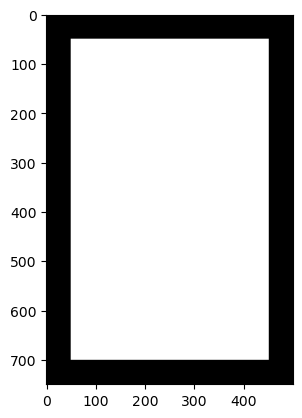

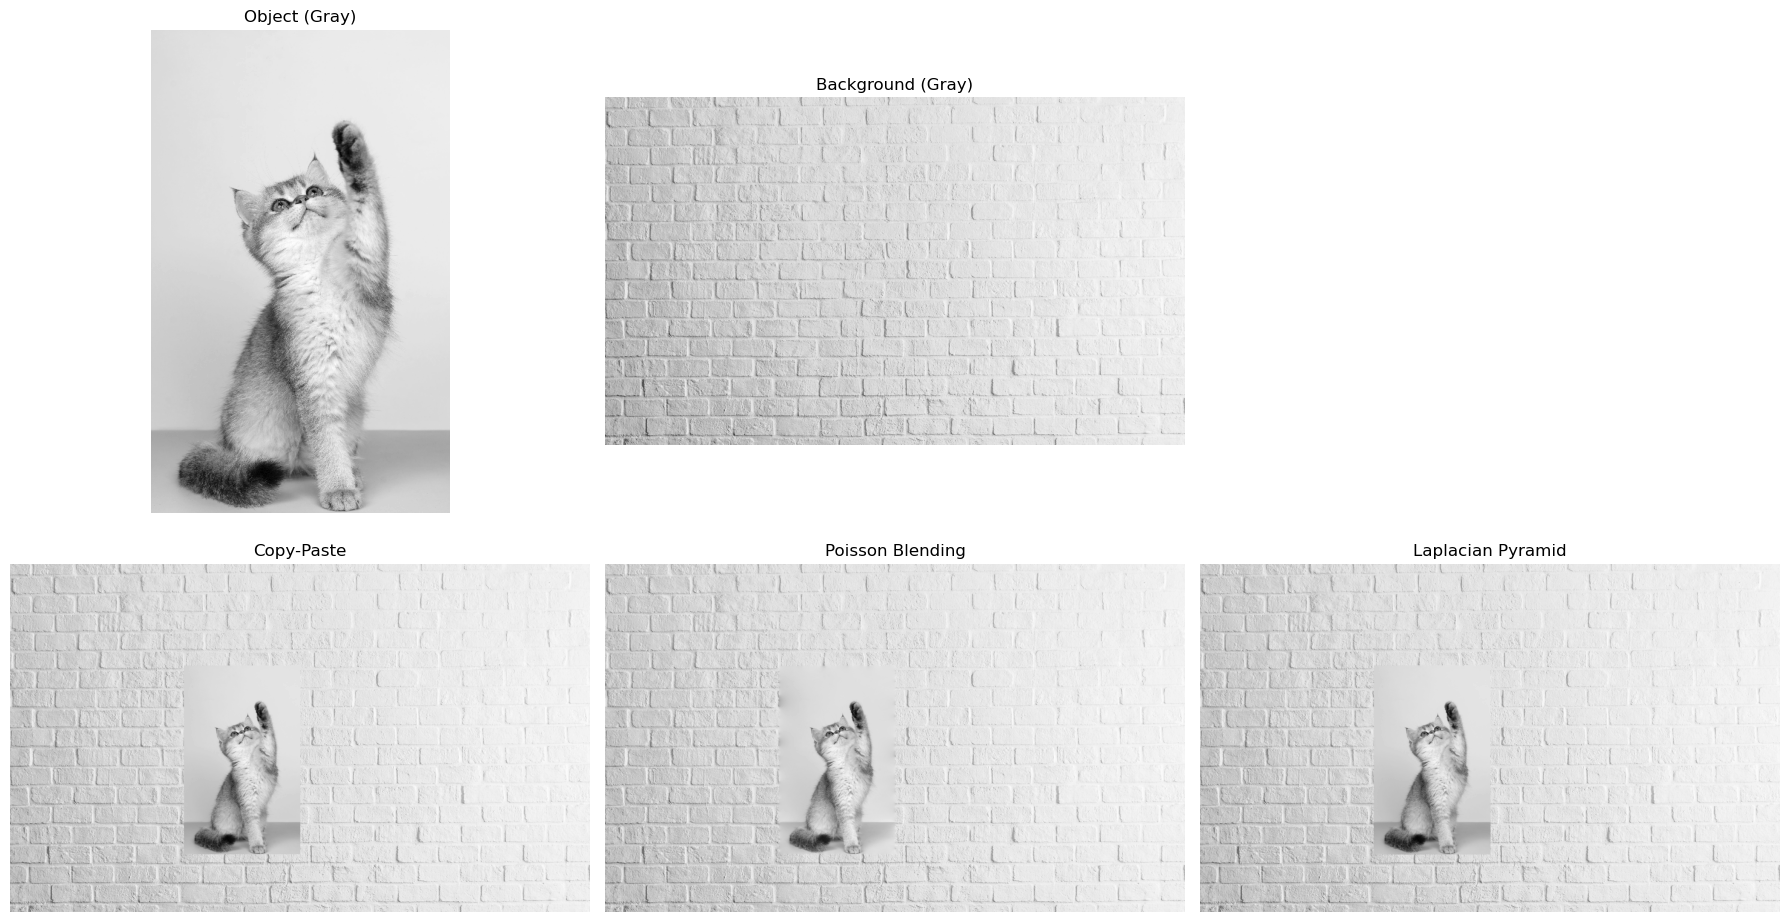

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy as sc

# ========== Load and Prepare Images (Grayscale) ==========
background_img = cv2.cvtColor(cv2.imread('samples/wall.jpg'), cv2.COLOR_BGR2RGB)
background_img = cv2.resize(background_img, (2000, 1200)).astype('double') / 255.0
background_gray = cv2.cvtColor((background_img * 255).astype('uint8'), cv2.COLOR_RGB2GRAY).astype('double') / 255.0

object_img = cv2.cvtColor(cv2.imread('samples/cat.jpeg'), cv2.COLOR_BGR2RGB)
object_img = cv2.resize(object_img, (500, 750)).astype('double') / 255.0

# ========== Mask and Position ==========
xs = (50, 450, 450, 50)
ys = (50, 50, 700, 700)
object_mask = utils.get_mask(ys, xs, object_img)

bottom_center = (800, 1000)
cropped_object_rgb, object_mask = utils.crop_object_img(object_img, object_mask)
object_gray = cv2.cvtColor((cropped_object_rgb * 255).astype('uint8'), cv2.COLOR_RGB2GRAY).astype('double') / 255.0
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
max_y = background_gray.shape[0] - object_gray.shape[0]
max_x = background_gray.shape[1] - object_gray.shape[1]
bg_ul = (min(bg_ul[0], max_y), min(bg_ul[1], max_x))

# ========== Crop background region ==========
bg_crop = background_gray[bg_ul[0]:bg_ul[0]+object_gray.shape[0], bg_ul[1]:bg_ul[1]+object_gray.shape[1]]

# ========== Copy-Paste ==========
copy_paste = background_gray.copy()
copy_paste[bg_ul[0]:bg_ul[0]+object_gray.shape[0], bg_ul[1]:bg_ul[1]+object_gray.shape[1]] = \
    object_gray * object_mask + bg_crop * (1 - object_mask)

# ========== Poisson Blending ==========
def get_im2var(mask):
    h, w = mask.shape
    im2var = -np.ones((h, w), dtype=int)
    im2var[mask > 0] = np.arange(np.sum(mask))
    return im2var

def poisson_blend_gray(source, target, mask):
    h, w = mask.shape
    im2var = get_im2var(mask)
    var_count = np.max(im2var) + 1
    A = sc.sparse.lil_matrix((var_count * 4, var_count))
    b = np.zeros((var_count * 4,))
    e = 0
    for y in range(h):
        for x in range(w):
            if mask[y, x]:
                i = im2var[y, x]
                for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
                    ny, nx = y + dy, x + dx
                    if 0 <= ny < h and 0 <= nx < w:
                        grad = source[y, x] - source[ny, nx]
                        if mask[ny, nx]:
                            j = im2var[ny, nx]
                            A[e, i] = 1
                            A[e, j] = -1
                        else:
                            A[e, i] = 1
                            grad += target[ny, nx]
                        b[e] = grad
                        e += 1
    v = sc.sparse.linalg.lsqr(A.tocsr(), b)[0]
    result = target.copy()
    for y in range(h):
        for x in range(w):
            if mask[y, x]:
                result[y, x] = np.clip(v[im2var[y, x]], 0, 1)
    return result

poisson_crop = poisson_blend_gray(object_gray, bg_crop, object_mask)
poisson_result = background_gray.copy()
poisson_result[bg_ul[0]:bg_ul[0]+object_gray.shape[0], bg_ul[1]:bg_ul[1]+object_gray.shape[1]] = poisson_crop

# ========== Laplacian Pyramid Blending ==========
def laplacian_blend(gray_obj, gray_bg, mask, levels=4):
    def build_gaussian_pyramid(img, levels):
        gp = [img]
        for _ in range(levels):
            img = cv2.pyrDown(img)
            gp.append(img)
        return gp

    def build_laplacian_pyramid(gp):
        lp = []
        for i in range(len(gp) - 1):
            size = (gp[i].shape[1], gp[i].shape[0])
            GE = cv2.pyrUp(gp[i+1], dstsize=size)
            L = gp[i] - GE
            lp.append(L)
        lp.append(gp[-1])
        return lp

    def blend_pyramids(lpA, lpB, gp_mask):
        return [la * gm + lb * (1.0 - gm) for la, lb, gm in zip(lpA, lpB, gp_mask)]

    def reconstruct(lp):
        img = lp[-1]
        for i in range(len(lp) - 2, -1, -1):
            size = (lp[i].shape[1], lp[i].shape[0])
            img = cv2.pyrUp(img, dstsize=size) + lp[i]
        return img

    gp_obj = build_gaussian_pyramid(gray_obj, levels)
    gp_bg = build_gaussian_pyramid(gray_bg, levels)
    gp_mask = build_gaussian_pyramid(mask.astype('float32'), levels)
    lp_obj = build_laplacian_pyramid(gp_obj)
    lp_bg = build_laplacian_pyramid(gp_bg)
    blended_pyramid = blend_pyramids(lp_obj, lp_bg, gp_mask)
    return np.clip(reconstruct(blended_pyramid), 0, 1)

laplace_crop = laplacian_blend(object_gray, bg_crop, object_mask)
laplace_result = background_gray.copy()
laplace_result[bg_ul[0]:bg_ul[0]+object_gray.shape[0], bg_ul[1]:bg_ul[1]+object_gray.shape[1]] = laplace_crop

# ========== Display Results ==========
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.imshow(object_gray, cmap='gray')
plt.title("Object (Gray)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(background_gray, cmap='gray')
plt.title("Background (Gray)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(copy_paste, cmap='gray')
plt.title("Copy-Paste")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(poisson_result, cmap='gray')
plt.title("Poisson Blending")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(laplace_result, cmap='gray')
plt.title("Laplacian Pyramid")
plt.axis('off')

plt.tight_layout()
plt.show()


## More gradient domain processing (up to 20 pts)